In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 

### Задание 1
1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени можно интерепретировать как временной ряд.
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В, можно интерпретировать. 
    
    в) количество отказов компьютера, если с течением времени, а не в зависимости от филиалов, например. 
    
    г) число обращений в поликлинику по району, наверняка в течение какого-то периода были зафиксированы, то есть да. 
    
    д) координаты автобуса при движении по маршруту, если с течением времени, то да, если только координаты, то нет.
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы, если как она со временем перемещалась, то да,если только координаты, то нет. 

### Задание 2
Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [49]:
df = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [50]:
df.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [52]:
df.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [53]:
df[df['DUQ_MW'].isnull()].count()

DUQ_MW    0
dtype: int64

Почасовое количество энергии, на первый взгляд без пропусков, 119068 записей, с 2005-12-31 01:00:00 по 2018-01-02 00:00:00

Text(0, 0.5, 'MW')

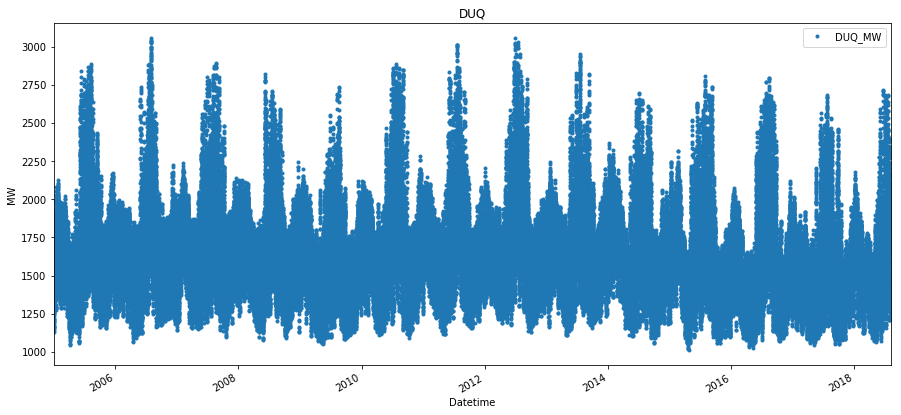

In [54]:
df.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ' )
plt.ylabel ( 'MW' )

Есть цикличность, есть периодичность, в таком представлении визуально каких-либо анамалий не видно.

In [55]:
df['DUQ_MW'] = df['DUQ_MW'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null int64
dtypes: int64(1)
memory usage: 1.8 MB


In [56]:
df['date'] = df.index
df.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458,2005-12-31 01:00:00
2005-12-31 02:00:00,1377,2005-12-31 02:00:00
2005-12-31 03:00:00,1351,2005-12-31 03:00:00
2005-12-31 04:00:00,1336,2005-12-31 04:00:00
2005-12-31 05:00:00,1356,2005-12-31 05:00:00


In [57]:
df = df.sort_index()
df['date']

Datetime
2005-01-01 01:00:00   2005-01-01 01:00:00
2005-01-01 02:00:00   2005-01-01 02:00:00
2005-01-01 03:00:00   2005-01-01 03:00:00
2005-01-01 04:00:00   2005-01-01 04:00:00
2005-01-01 05:00:00   2005-01-01 05:00:00
                              ...        
2018-08-02 20:00:00   2018-08-02 20:00:00
2018-08-02 21:00:00   2018-08-02 21:00:00
2018-08-02 22:00:00   2018-08-02 22:00:00
2018-08-02 23:00:00   2018-08-02 23:00:00
2018-08-03 00:00:00   2018-08-03 00:00:00
Name: date, Length: 119068, dtype: datetime64[ns]

In [58]:
ut = df['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', df.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


Но на самом деле дубли есть, посмотрим на них:

In [59]:
count_data = df['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

Каждый раз в первое воскресенье ноября, т.е. связан с переводом часов. Так как казалось, что пропусков нет, значит не хватает еще четырех значений:

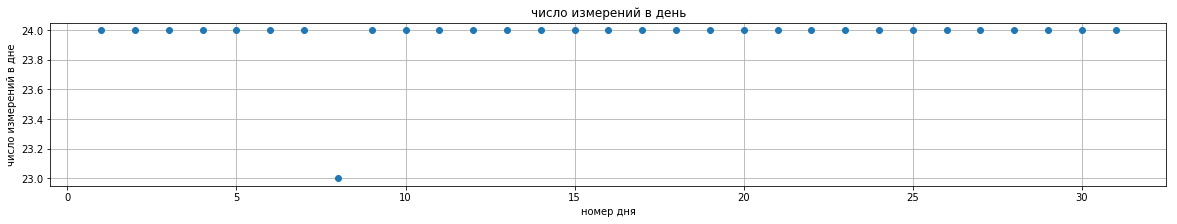

In [60]:
day_H=df['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.grid()
plt.show()

### Задание 3
Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [61]:
df_brent = pd.read_excel('Downloads/нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [62]:
df_brent

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59
...,...
2010-09-05,76.63
2010-09-04,76.62
2010-09-03,76.57


In [63]:
df_brent_resampled_months = df_brent.resample("M").mean()
df_brent_resampled_months.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [64]:
df_brent_resampled_weeks = df_brent.resample("W").mean()
df_brent_resampled_weeks.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


### Задание 4
Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [65]:
df_brent_resampled_years = df_brent.resample("Y").mean()
df_brent_resampled_years

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493
2015-12-31,53.969743
2016-12-31,45.350502
2017-12-31,54.720814
2018-12-31,71.651419


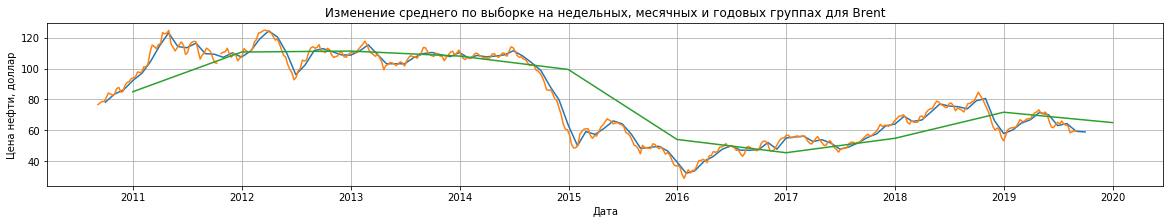

In [66]:
plt.figure(figsize=(20,3))
plt.plot(df_brent_resampled_months)
plt.plot(df_brent_resampled_weeks)
plt.plot(df_brent_resampled_years)
plt.xlabel('Дата')
plt.ylabel('Цена нефти, доллар')
plt.title('Изменение среднего по выборке на недельных, месячных и годовых группах для Brent')
plt.grid()

plt.show()
plt.show()

In [67]:
df_brent_resampled_std_weeks = df_brent.resample("W").std()
df_brent_resampled_std_months = df_brent.resample("M").std()
df_brent_resampled_std_years = df_brent.resample("Y").std()

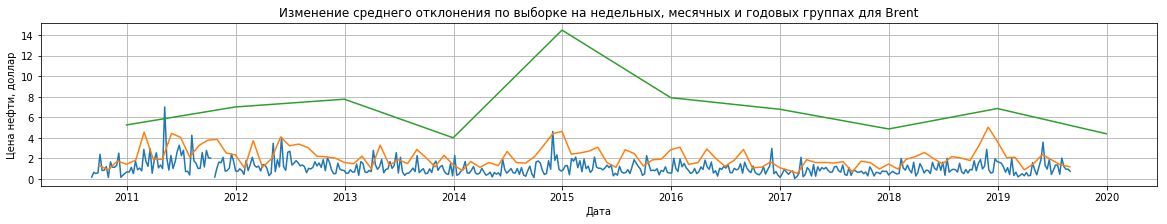

In [68]:
plt.figure(figsize=(20,3))
plt.plot(df_brent_resampled_std_weeks)
plt.plot(df_brent_resampled_std_months)
plt.plot(df_brent_resampled_std_years)
plt.xlabel('Дата')
plt.ylabel('Цена нефти, доллар')
plt.title('Изменение среднего отклонения по выборке на недельных, месячных и годовых группах для Brent')
plt.grid()
plt.show()

### Задание 5
Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

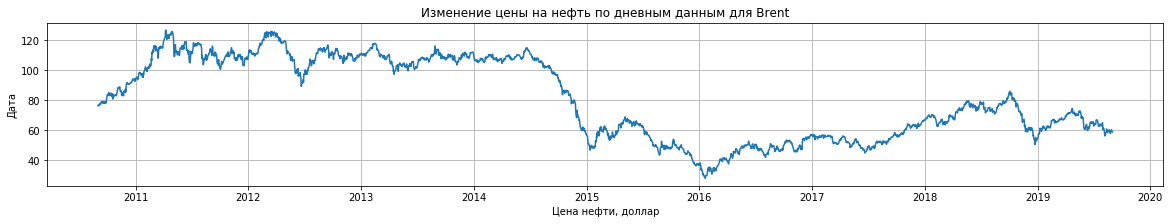

In [69]:
plt.figure(figsize=(20,3))
plt.plot(df_brent)
plt.xlabel('Цена нефти, доллар')
plt.ylabel('Дата')
plt.title('Изменение цены на нефть по дневным данным для Brent')
plt.grid()
plt.show()

Не очень поняла вопрос, поведение цены в разных выборках никак не изменилась, на дневных данных больше подробностей, на средних данных виднее тренд, на годовых данных по std очевиден кризис 2014 года.